In [36]:
!pip install --upgrade plotly
!pip install hvplot

In [37]:
from typing_extensions import AsyncGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hvplot.pandas
import holoviews as hv
import plotly.graph_objects as go
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import panel as pn

In [38]:
visitors = pd.read_csv('/content/Visitors.csv', index_col=0)
age = pd.read_csv('/content/Age.csv', index_col=0)
capacity = pd.read_csv('/content/Capacity.csv', index_col=0)
marketing = pd.read_csv('/content/Marketing.csv', index_col=0)
overheads = pd.read_csv('/content/Overheads.csv', index_col=0)
spend = pd.read_csv('/content/Spend.csv', index_col=0)

In [39]:
#Combining csv files to create a summary dataframe
summary_data = pd.DataFrame(index=visitors.columns)
summary_data['Visitors'] = visitors.sum().values
summary_data['Age'] = age.values
summary_data['Capacity'] = capacity.values
summary_data['Overheads'] = overheads.values
summary_data['Spend (£)'] = spend.values
summary_data['Marketing (£)'] = marketing.values

print(summary_data.head(30))
print(summary_data.describe())

          Visitors  Age  Capacity  Overheads  Spend (£)  Marketing (£)
cinema1       5300   43        31         29         39              2
cinema2      27361   41        51         51         34              4
cinema3      37132   28        53         62         19             13
cinema4      11484   30        28         82         18              5
cinema5      96854   37       275         64         28             27
cinema6       6000   30        29         64         17              3
cinema7      19969   33        64         42         28             12
cinema8      62889   38       133         74         16             21
cinema9      85177   44       182         37         37             24
cinema10     26001   32        68         28         26             16
cinema11     11332   29        35         62         11              8
cinema12     10998   27        31         95         14              7
cinema13     29777   45       101         79         33             15
cinema

In [40]:
#Ensuring data is clean
print(summary_data.info())
print(summary_data.duplicated().sum())
print(summary_data.isnull().sum())
for column in summary_data.columns:
    print(f"Unique values in {column}: {summary_data[column].nunique()}")

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, cinema1 to cinema30
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Visitors       30 non-null     int64
 1   Age            30 non-null     int64
 2   Capacity       30 non-null     int64
 3   Overheads      30 non-null     int64
 4   Spend (£)      30 non-null     int64
 5   Marketing (£)  30 non-null     int64
dtypes: int64(6)
memory usage: 1.6+ KB
None
0
Visitors         0
Age              0
Capacity         0
Overheads        0
Spend (£)        0
Marketing (£)    0
dtype: int64
Unique values in Visitors: 30
Unique values in Age: 16
Unique values in Capacity: 25
Unique values in Overheads: 27
Unique values in Spend (£): 21
Unique values in Marketing (£): 29


# **Bar Chart** for total visits for each cinema (colour-coded)

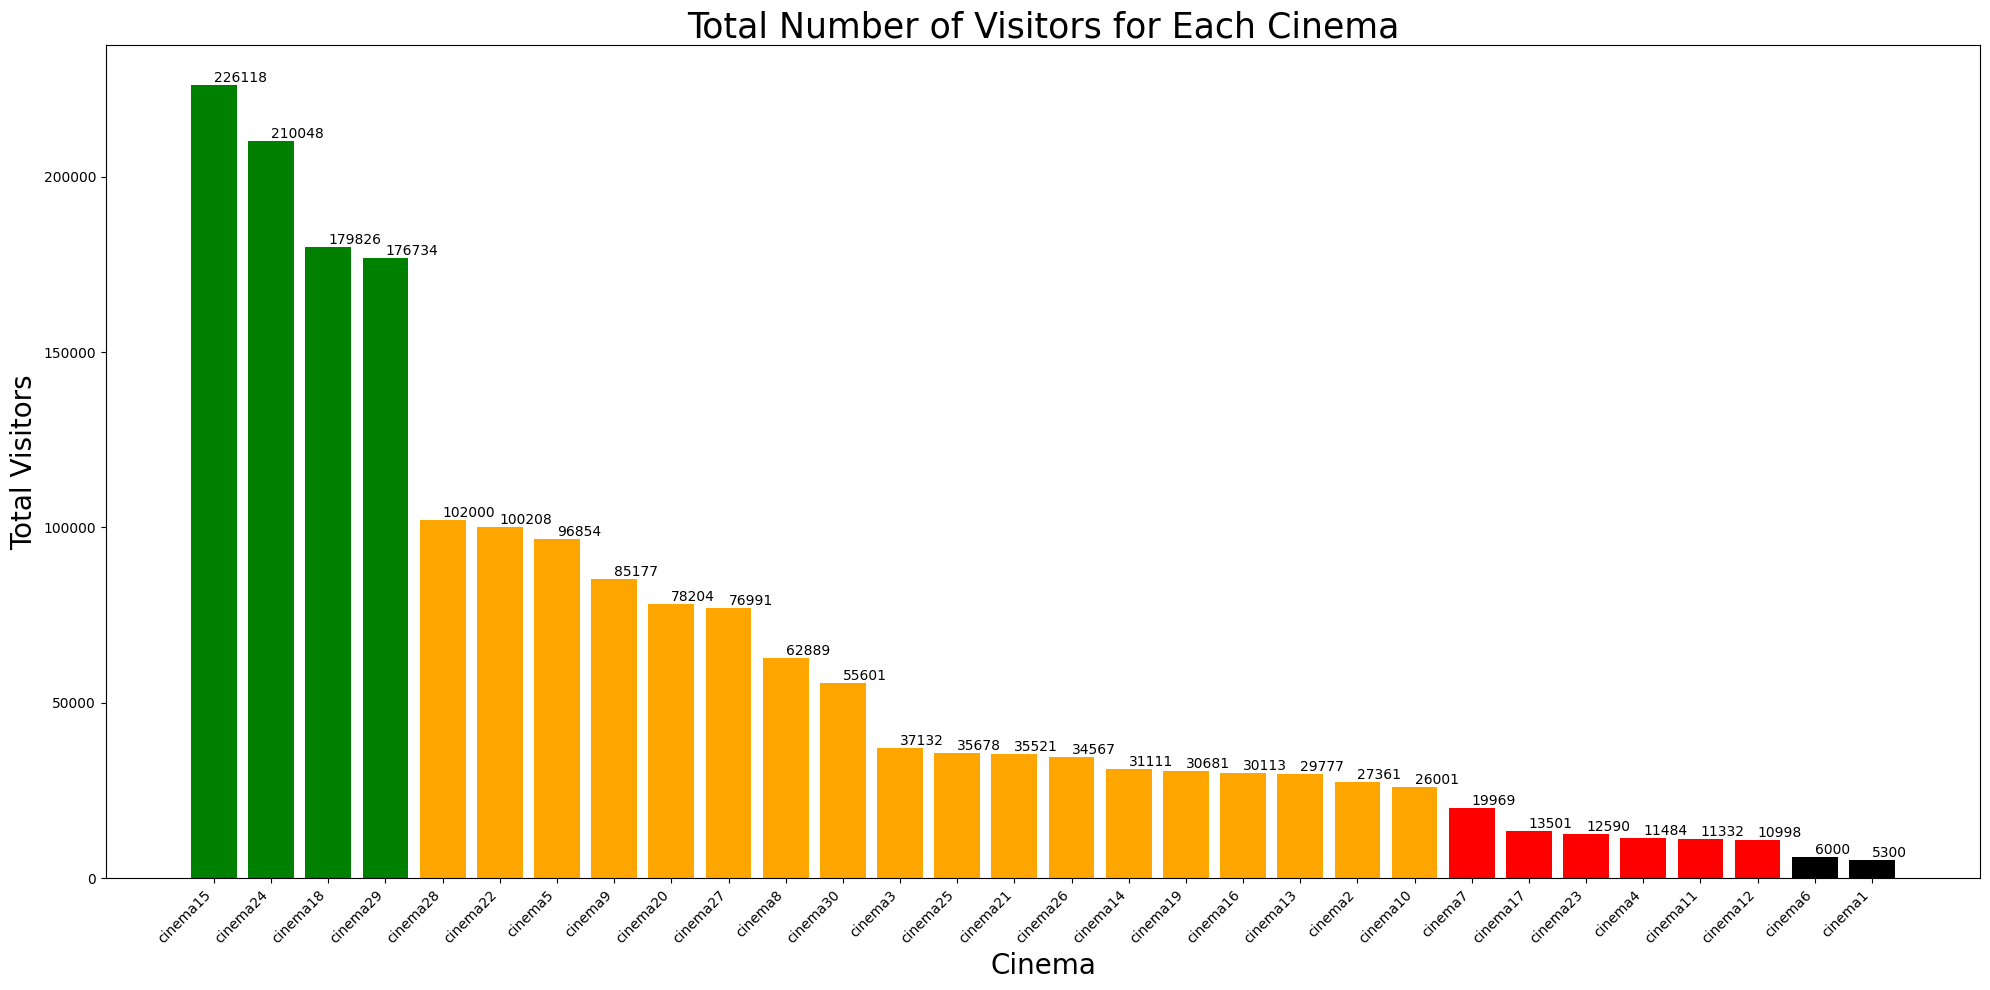

In [50]:
colours = []
for name in summary_data.index:
    total_visits = summary_data.loc[name, 'Visitors']
    if total_visits > 103000:
        colour = 'green'
    elif total_visits > 20000:
        colour = 'orange'
    elif total_visits > 10000:
        colour = 'red'
    else:
        colour = 'black'
    colours.append(colour)

summary_data = summary_data.sort_values(by='Visitors', ascending=False)

plt.figure(figsize=(20, 10))
bars = plt.bar(summary_data.index, summary_data['Visitors'], color=colours)
plt.xlabel('Cinema', fontsize=20)
plt.ylabel('Total Visitors', fontsize=20)
plt.title('Total Number of Visitors for Each Cinema', fontsize=25)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval), va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Separate cinemas based on colours

In [42]:
high_vol = ['cinema5', 'cinema15', 'cinema18','cinema24', 'cinema29']#5
print(summary_data.loc[high_vol].head(7))#.loc for the indices
medi_vol = ['cinema2', 'cinema3','cinema7', 'cinema8', 'cinema9', 'cinema10', 'cinema13', 'cinema14', 'cinema16', 'cinema19', 'cinema20', 'cinema21', 'cinema22' ,'cinema25', 'cinema26', 'cinema27','cinema28', 'cinema30']#18
print(summary_data.loc[medi_vol].head(20))
low_vol = ['cinema1', 'cinema4', 'cinema6', 'cinema11', 'cinema12', 'cinema17', 'cinema23']#7
print(summary_data.loc[low_vol].head(7))

          Visitors  Age  Capacity  Overheads  Spend (£)  Marketing (£)
cinema5      96854   37       275         64         28             27
cinema15    226118   33       354         23         14             30
cinema18    179826   42       520        107         40             26
cinema24    210048   35       465         63         23             29
cinema29    176734   36       299         87         21             25
          Visitors  Age  Capacity  Overheads  Spend (£)  Marketing (£)
cinema2      27361   41        51         51         34              4
cinema3      37132   28        53         62         19             13
cinema7      19969   33        64         42         28             12
cinema8      62889   38       133         74         16             21
cinema9      85177   44       182         37         37             24
cinema10     26001   32        68         28         26             16
cinema13     29777   45       101         79         33             15
cinema

# **Rolling Average Dashboard** for High volume cinemas
Contains the option to select the volume of cinemas you wish to see using the drop down menu on the left. Observations in the report of Figure 2 and Figure 8 were made using this plot.

In [43]:
pn.extension(comms='colab')
visitors.index = pd.to_datetime(visitors.index, format='%m/%Y')
def get_line_plot(volume, window_size):
    if volume == 'high':
        selected = ['cinema5', 'cinema15', 'cinema18','cinema24', 'cinema29']
    elif volume == 'medium':
        selected = ['cinema2', 'cinema3','cinema7', 'cinema8', 'cinema9', 'cinema10', 'cinema13', 'cinema14', 'cinema16', 'cinema19', 'cinema20', 'cinema21', 'cinema22' ,'cinema25', 'cinema26', 'cinema27','cinema28', 'cinema30']
    else:
        selected = ['cinema1', 'cinema4', 'cinema6', 'cinema11', 'cinema12', 'cinema17', 'cinema23']
    df = visitors[selected]
    df = df.rolling(window=window_size).mean()
    plot = df.hvplot.line(frame_width=600, grid=True)
    return pn.pane.HoloViews(plot)

time_title = '## Time-Series'

volumes = ['high', 'medium', 'low']
volume = pn.widgets.Select(name='Volume', options=volumes, width=200)
day_avg = pn.widgets.IntSlider(name='Day average', value=14, start=1, end=21, width=200)

time_row = pn.Row(
    pn.Column(time_title, volume, day_avg),
    get_line_plot(volume.value, day_avg.value)
)
def update_time_row(event):
    hv_plot = get_line_plot(volume.value, day_avg.value)
    time_row[1].object = hv_plot.object

volume.param.watch(update_time_row, 'value')
day_avg.param.watch(update_time_row, 'value')
time_row.servable()

Row
    [0] Column
        [0] Markdown(str)
        [1] Select(name='Volume', options=['high', 'medium', 'low'], value='high', width=200)
        [2] IntSlider(end=21, name='Day average', start=1, value=14, width=200)
    [1] HoloViews(NdOverlay, height=300, sizing_mode='fixed')

# **Correlation Heatmap** for high and medium volume cinemas.

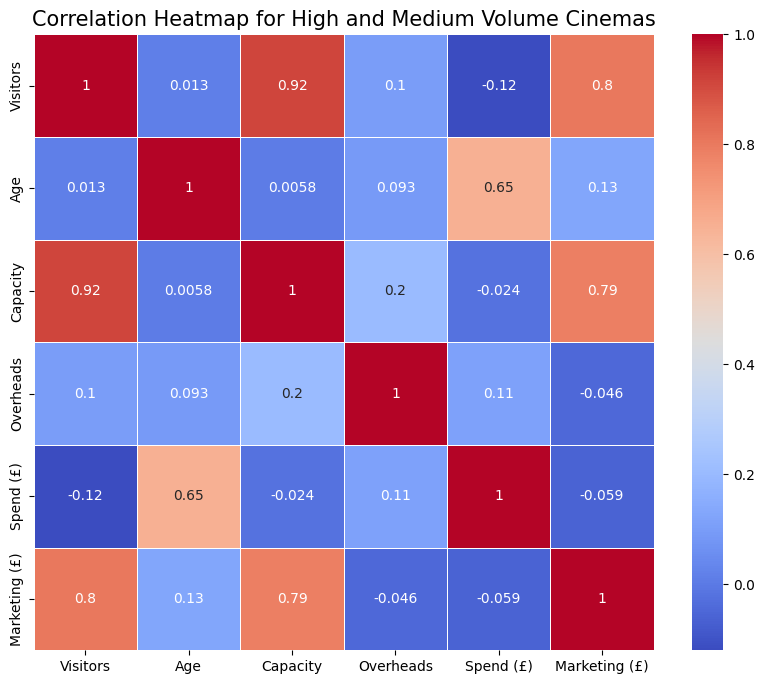

In [44]:
selected_cinemas = high_vol + medi_vol
filtered_data = summary_data.loc[selected_cinemas]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for High and Medium Volume Cinemas', fontsize=15)
plt.show()

# **Scatter Plot** of the Spend vs Age with a Trendline

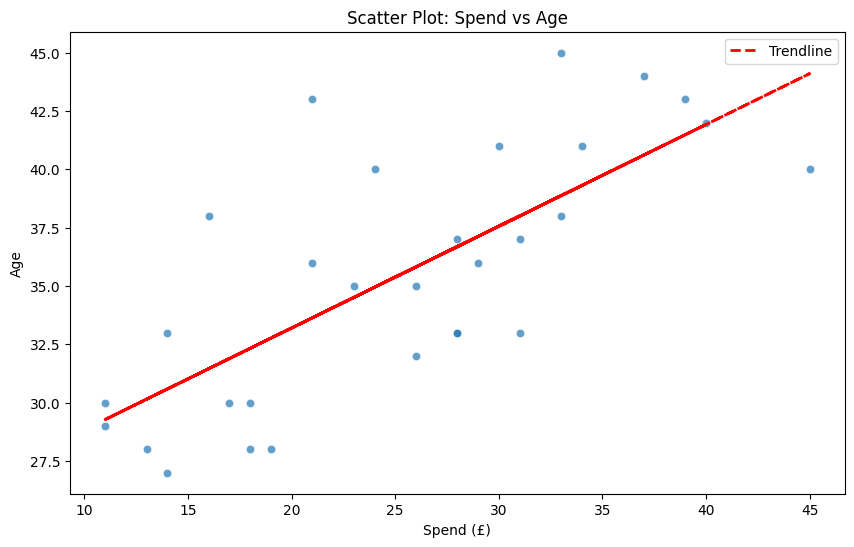

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(summary_data['Spend (£)'], summary_data['Age'], alpha=0.7, edgecolors="w", linewidth=0.5)
plt.xlabel('Spend (£)')
plt.ylabel('Age')
plt.title('Scatter Plot: Spend vs Age')

z = np.polyfit(summary_data['Spend (£)'], summary_data['Age'], 1)
trend = np.poly1d(z)
plt.plot(summary_data['Spend (£)'], trend(summary_data['Spend (£)']), linestyle='--', color='red', linewidth=2, label='Trendline')

plt.legend()
plt.show()

# **3D Scatter Plot** for the three vartiables (marketing, spend and visitors) with the strongest correlations


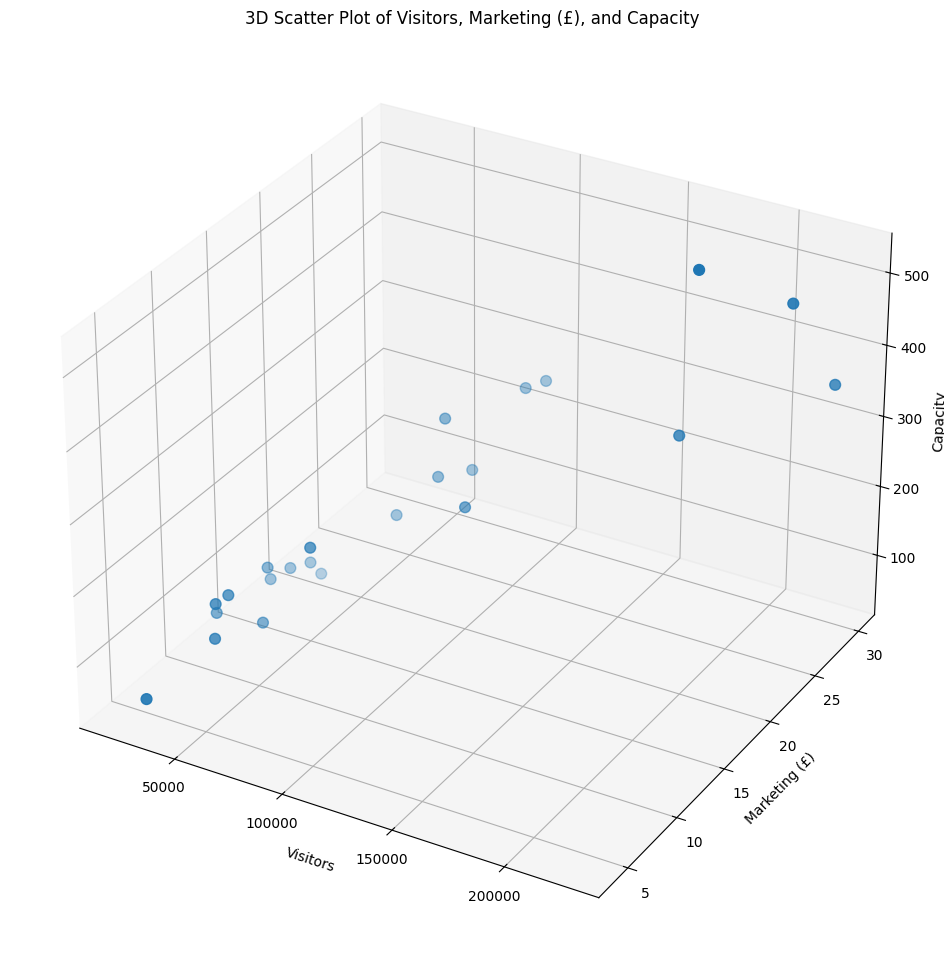

In [46]:
fig = plt.figure(figsize=(12, 12))
sub = fig.add_subplot(111, projection='3d')
selected_cinemas = high_vol + medi_vol
selected_data = summary_data.loc[selected_cinemas]

sub.scatter(selected_data['Visitors'], selected_data['Marketing (£)'], selected_data['Capacity'], s=60)
sub.set_xlabel('Visitors')
sub.set_ylabel('Marketing (£)')
sub.set_zlabel('Capacity')
plt.title('3D Scatter Plot of Visitors, Marketing (£), and Capacity')

plt.show()

#**Bubble Plot** of Spend vs Overheads

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
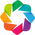

:Overlay
   .Scatter.I :Scatter   [Overheads]   (Spend (£),BubbleSize,index)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]

In [47]:
money_data = pd.DataFrame({
    'Overheads': summary_data['Overheads'].values.flatten(),
    'Spend (£)': summary_data['Spend (£)'].values.flatten(),
})
money_data['BubbleSize'] = money_data['Spend (£)'] * 35
bubble_plot = money_data.hvplot.scatter(
    x='Overheads', y='Spend (£)', size='BubbleSize',
    xlabel='Overheads', ylabel='Spend (£)', title='Overheads vs Spend (£)',
    frame_height=500, frame_width=500,
    alpha=0.5, padding=0.5,
    hover_cols=['index', 'Visitors', 'Marketing (£)', 'Overheads','Spend (£)', 'Age'],
    tools=['wheel_zoom', 'box_zoom', 'undo', 'redo', 'hover', 'save', 'reset']
)
hline20 = hv.HLine(y=20).opts(color='red', line_dash='dotted')
hline13 = hv.HLine(y=13).opts(color='blue', line_dash='dashed')
hv.extension('bokeh')
bubble_plot * hline20 *hline13

#**Faceted Boxplot** displaying Overheads for high and medium volume cinemas

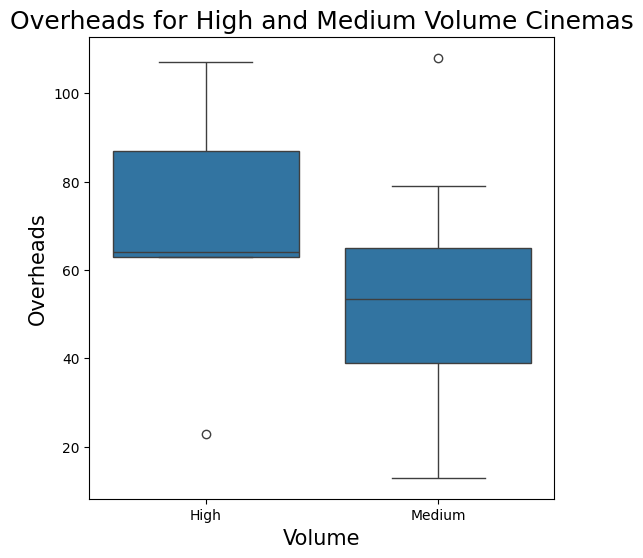

In [48]:
selected_high_vol = summary_data.loc[high_vol, 'Overheads']
selected_medi_vol = summary_data.loc[medi_vol, 'Overheads']

combined_data = pd.concat([selected_high_vol, selected_medi_vol], keys=['High', 'Medium'])

plt.figure(figsize=(6, 6))
sns.boxplot(x='level_0', y='Overheads', data=combined_data.reset_index())
plt.xlabel('Volume', fontsize=15)
plt.ylabel('Overheads', fontsize=15)
plt.title('Overheads for High and Medium Volume Cinemas', fontsize=18)
plt.show()

#**Histogram** of Age distribution to understand the demographic profile of the customers


11 bins


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
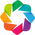

:Histogram   [Age]   (Count)

In [49]:
x_min = 0
x_max = 55000
bin_width = 5000
n_bins = int((x_max - x_min) / bin_width)
print(f'{n_bins} bins')
bins = [(x_min + x * bin_width) for x in range(n_bins + 1)]
selected= high_vol + medi_vol
histo =summary_data['Age'].loc[selected].hvplot.hist(
    frame_height=500, frame_width=500,
    xlabel='Age', ylabel='Frequency',
    title='Visitor Age Distribution at Cinemas',
    alpha=0.5, muted_alpha=0, muted_fill_alpha=0, muted_line_alpha=0,
    tools=['pan', 'box_zoom', 'wheel_zoom', 'undo', 'redo', 'hover', 'save', 'reset']
)
hv.extension('bokeh')
histo